In [30]:
pip install pycnv

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 3.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 514.9 kB/s eta 0:00:00a 0:00:02
  Created wheel for pycnv: filename=pycnv-0.4.8-py3-none-any.whl size=42895 sha256=f06fa40fd69bbda04e8015c011fd11cdaff3f3c7f24f8673d4b3ae62fc70cd01
  Stored in directory: /Users/gonzaloruiz/Library/Caches/pip/wheels/14/f8/fe/5f979cba42de7da1bcbc4cd5e26c19801c6890cb404c45c628
Successfully built pycnv
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install pycnv


     ---------------------------------------- 0.0/193.5 kB ? eta -:--:--
     ------ --------------------------------- 30.7/193.5 kB ? eta -:--:--
     ------ --------------------------------- 30.7/193.5 kB ? eta -:--:--
     ------ --------------------------------- 30.7/193.5 kB ? eta -:--:--
     ------ --------------------------------- 30.7/193.5 kB ? eta -:--:--
     ----------------- ------------------- 92.2/193.5 kB 403.5 kB/s eta 0:00:01
     ----------------- ------------------- 92.2/193.5 kB 403.5 kB/s eta 0:00:01
     ----------------- ------------------- 92.2/193.5 kB 403.5 kB/s eta 0:00:01
     ----------------- ------------------- 92.2/193.5 kB 403.5 kB/s eta 0:00:01
     ----------------- ------------------- 92.2/193.5 kB 403.5 kB/s eta 0:00:01
     ----------------- ------------------- 92.2/193.5 kB 403.5 kB/s eta 0:00:01
     ----------------- ------------------- 92.2/193.5 kB 403.5 kB/s eta 0:00:01
     ------------------------------------ 193.5/193.5 kB 345.2 kB/s et

In [32]:
import csv
import gsw
import numpy as np
import pycnv
import pylab as pl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from cmocean import cm as cmo

## DAY 1

In [2]:
fname = 'CTD_05_avg.cnv'
cnv = pycnv.pycnv(fname)
print('Test if we are in the Baltic Sea (usage of different equation of state): ' + str(cnv.baltic))
print('Position of cast is: Longitude:', cnv.lon,'Latitude:',cnv.lat)
print('Time of cast was:', cnv.date)
print('Number of sensor entries (len(cnv.data.keys())):',len(cnv.data.keys()))
print('Names of sensor entries (cnv.data.keys()):',cnv.data.keys())

INFO:pycnv: Opening file: CTD_05_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm


Date
Computing date
Test if we are in the Baltic Sea (usage of different equation of state): False
Position of cast is: Longitude: 10.7845 Latitude: 57.948166666666665
Time of cast was: 2025-05-07 08:44:53+00:00
Number of sensor entries (len(cnv.data.keys())): 18
Names of sensor entries (cnv.data.keys()): dict_keys(['scan', 'prDM', 'p', 't090C', 'T0', 'c0S/m', 'C0', 'flECO-AFL', 'sbeox0V', 'oxy0', 'turbWETntu0', 'turb', 'depSM', 'depSM@7', 'sal00', 'sbeox0Mm/L', 'sbeox0PS', 'flag'])


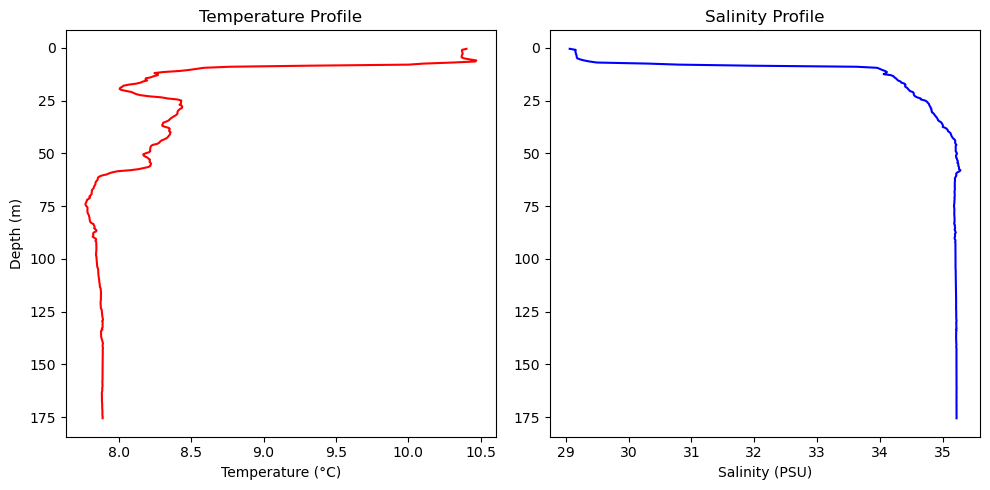

In [3]:
depth = cnv.data['depSM']      
temperature = cnv.data['t090C'] 
salinity = cnv.data['sal00']   

plt.figure(figsize=(10, 5))

# Plot Temperature
plt.subplot(1, 2, 1)
plt.plot(temperature, depth, 'r')
plt.gca().invert_yaxis()  # Depth increases downward
plt.xlabel('Temperature (°C)')
plt.ylabel('Depth (m)')
plt.title('Temperature Profile')

# Plot Salinity
plt.subplot(1, 2, 2)
plt.plot(salinity, depth, 'b')
plt.gca().invert_yaxis()
plt.xlabel('Salinity (PSU)')
plt.title('Salinity Profile')

plt.tight_layout()
plt.show()

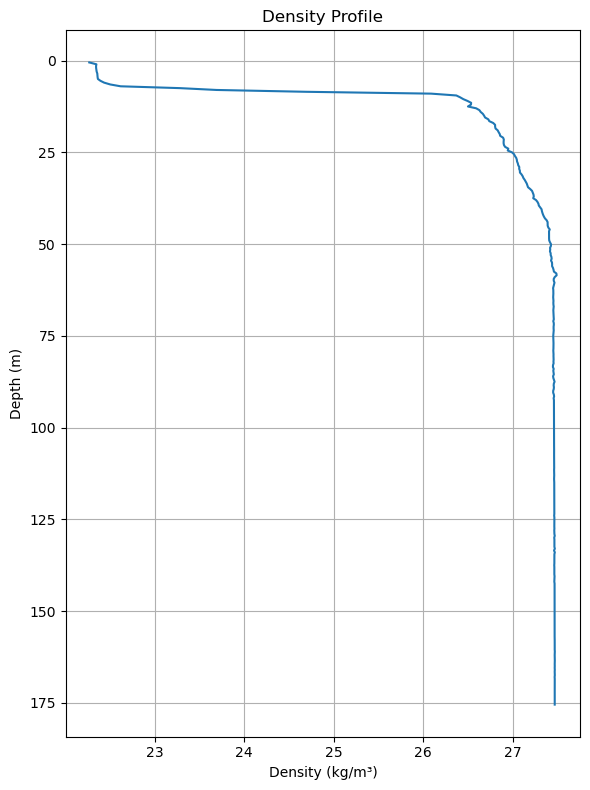

In [4]:
sal = np.array(cnv.data['sal00'])      # Practical Salinity (PSU)
temp = np.array(cnv.data['t090C'])     # In-situ temperature (°C)
pres = np.array(cnv.data['prDM'])      # Pressure (dbar)
lat = cnv.lat
lon = cnv.lon

# Convert to Absolute Salinity (g/kg)
SA = gsw.SA_from_SP(sal, pres, lon, lat)

# Convert to Conservative Temperature (°C)
CT = gsw.CT_from_t(SA, temp, pres)

# Calculate potential density (kg/m^3)
rho = gsw.density.sigma0(SA,CT)

depth = cnv.data['depSM']
plt.figure(figsize=(6, 8))
plt.plot(rho, depth)
plt.gca().invert_yaxis()
plt.xlabel('Density (kg/m³)')
plt.ylabel('Depth (m)')
plt.title('Density Profile')
plt.grid()
plt.tight_layout()
plt.savefig('density_profile.png')
plt.show()

In [108]:
fname = 'CTD_013_avg.cnv'
folder_name = os.path.splitext(fname)[0]

# Create folder if it doesn't exist
os.makedirs(folder_name, exist_ok=True)

# Extract variables
depth = cnv.data['depSM']
temperature = cnv.data['t090C']
salinity = cnv.data['sal00']
oxygen = cnv.data.get('oxy0')
fluorescence = cnv.data.get('flECO-AFL')
turbidity = cnv.data.get('turb')

# Plotting function
def plot_profile(x, y, xlabel, title, filename):
    plt.figure(figsize=(6, 8))
    plt.plot(x, y)
    plt.gca().invert_yaxis()
    plt.xlabel(xlabel)
    plt.ylabel('Depth (m)')
    plt.title(title)
    plt.grid()
    plt.tight_layout()
    plt.savefig(os.path.join(folder_name, filename))
    plt.close()

# Plot and save each variable
plot_profile(temperature, depth, 'Temperature (°C)', 'Temperature Profile', 'temperature_profile.png')
plot_profile(salinity, depth, 'Salinity (PSU)', 'Salinity Profile', 'salinity_profile.png')

if oxygen is not None:
    plot_profile(oxygen, depth, 'Oxygen (µmol/L or similar)', 'Oxygen Profile', 'oxygen_profile.png')

if fluorescence is not None:
    plot_profile(fluorescence, depth, 'Fluorescence (A.U.)', 'Fluorescence Profile', 'fluorescence_profile.png')

if turbidity is not None:
    plot_profile(turbidity, depth, 'Turbidity (NTU or A.U.)', 'Turbidity Profile', 'turbidity_profile.png')

print(f"All plots saved in folder: {folder_name}")


All plots saved in folder: CTD_013_avg


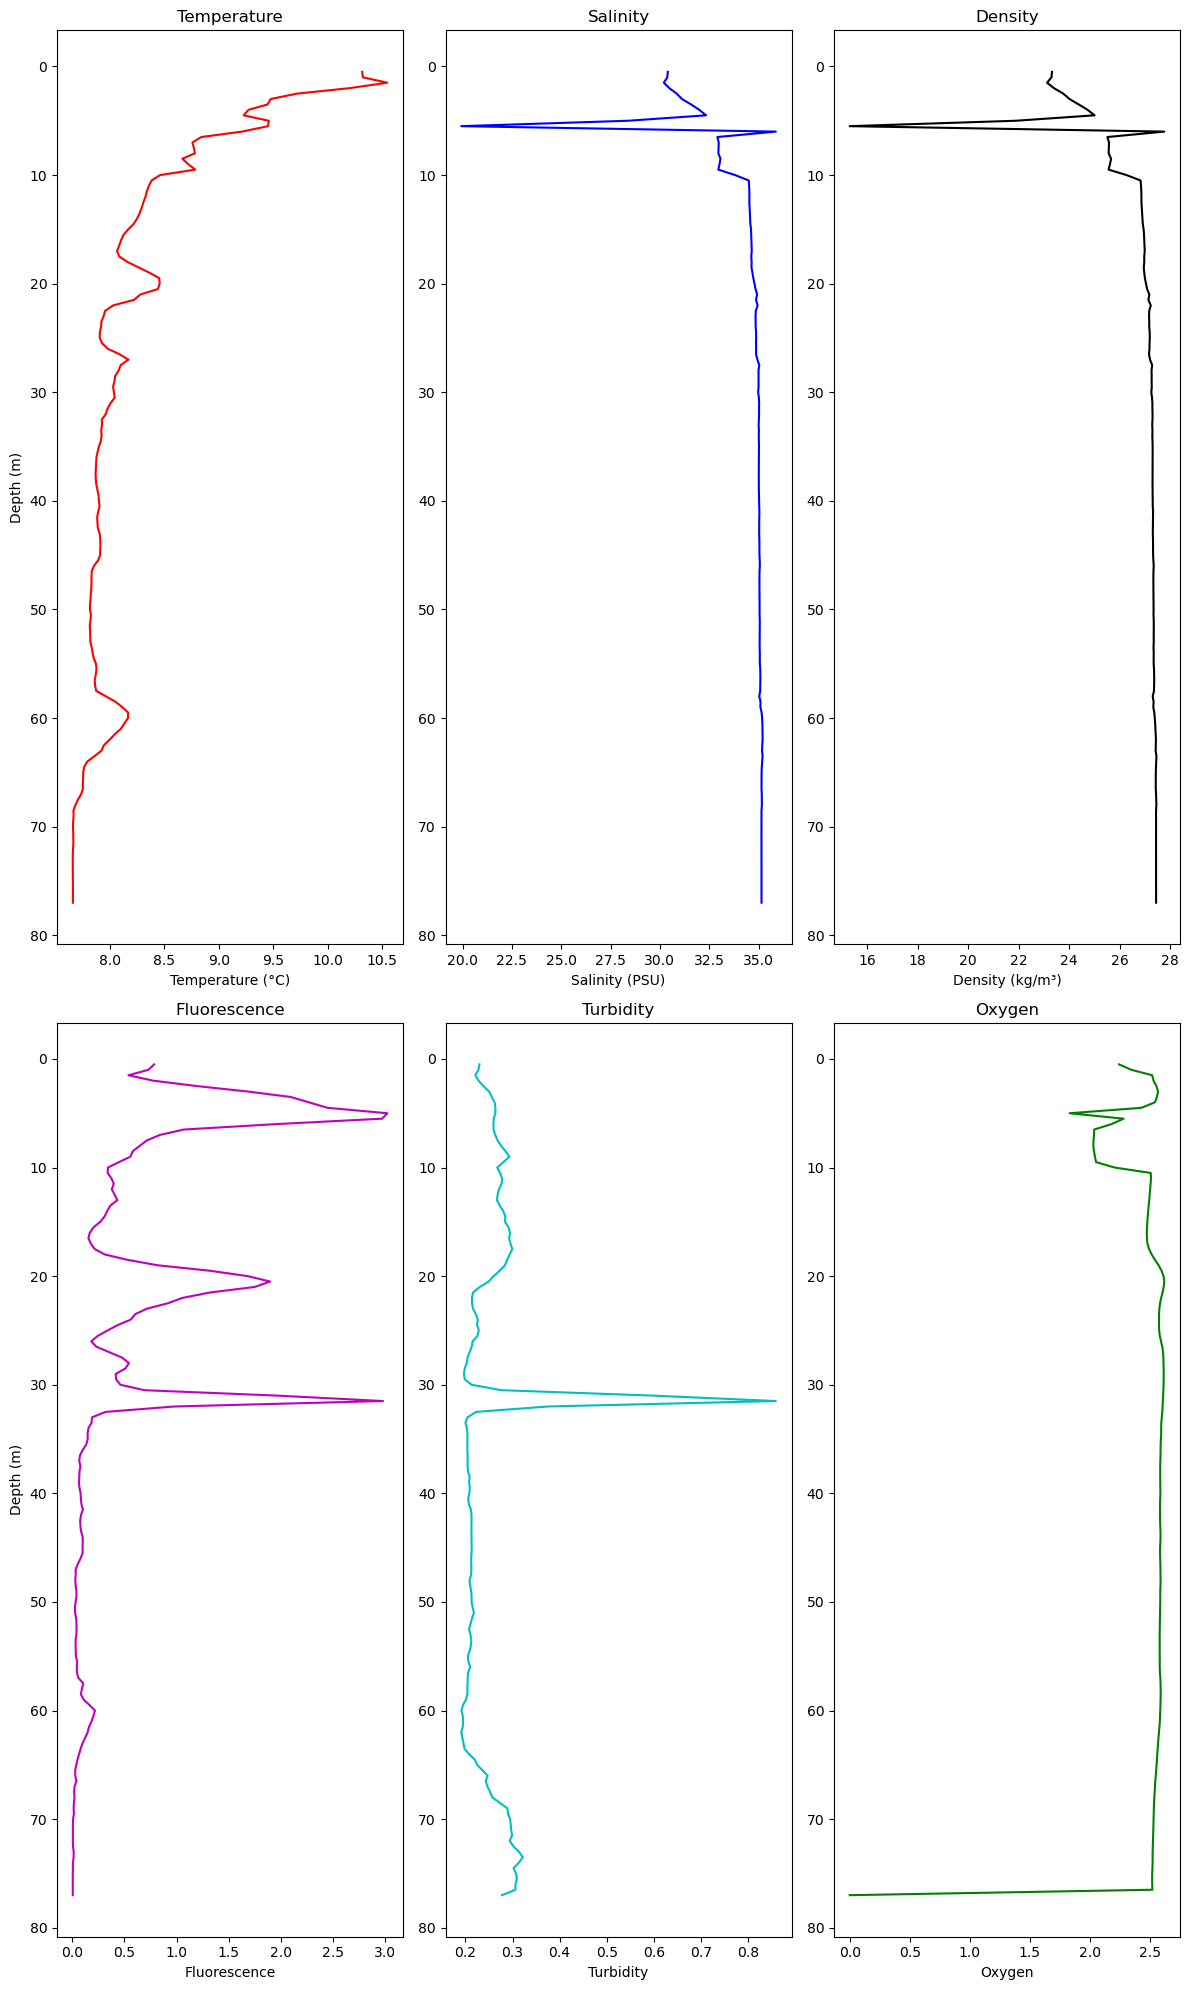

In [109]:
depth = cnv.data['depSM']
temperature = np.array(cnv.data['t090C'])
salinity = np.array(cnv.data['sal00'])
pressure = np.array(cnv.data['prDM'])
oxygen = np.array(cnv.data['oxy0'])
fluorescence = np.array(cnv.data['flECO-AFL'])
turbidity = np.array(cnv.data['turb'])

# Compute potential density using TEOS-10 (gsw)
SA = gsw.SA_from_SP(salinity, pressure, cnv.lon, cnv.lat)
CT = gsw.CT_from_t(SA, temperature, pressure)
density = gsw.density.sigma0(SA,CT)

# Create a 3x2 subplot grid
fig, axs = plt.subplots(2, 3, figsize=(12, 20))

# Temperature
axs[0, 0].plot(temperature, depth, 'r')
axs[0, 0].invert_yaxis()
axs[0, 0].set_xlabel('Temperature (°C)')
axs[0, 0].set_ylabel('Depth (m)')
axs[0, 0].set_title('Temperature')

# Salinity
axs[0, 1].plot(salinity, depth, 'b')
axs[0, 1].invert_yaxis()
axs[0, 1].set_xlabel('Salinity (PSU)')
axs[0, 1].set_title('Salinity')

# Oxygen
axs[1, 2].plot(oxygen, depth, 'g')
axs[1, 2].invert_yaxis()
axs[1, 2].set_xlabel('Oxygen')
axs[1, 2].set_title('Oxygen')

# Fluorescence
axs[1, 0].plot(fluorescence, depth, 'm')
axs[1, 0].invert_yaxis()
axs[1, 0].set_xlabel('Fluorescence')
axs[1, 0].set_ylabel('Depth (m)')
axs[1, 0].set_title('Fluorescence')

# Turbidity
axs[1, 1].plot(turbidity, depth, 'c')
axs[1, 1].invert_yaxis()
axs[1, 1].set_xlabel('Turbidity')
axs[1, 1].set_title('Turbidity')

# Density
axs[0, 2].plot(density, depth, 'k')
axs[0, 2].invert_yaxis()
axs[0, 2].set_xlabel('Density (kg/m³)')
axs[0, 2].set_title('Density')

plt.tight_layout()
plt.show()


**Potential density**

In [112]:
sigma0 = gsw.density.sigma0(SA,CT)

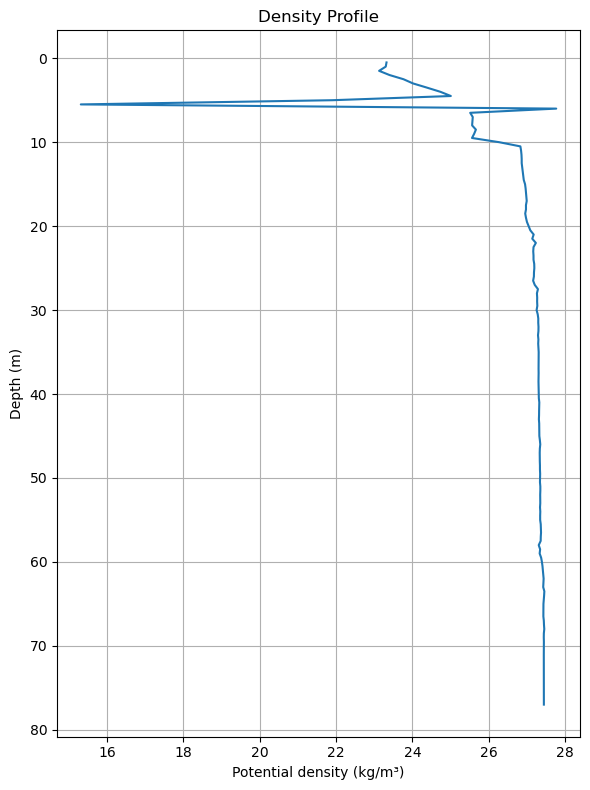

In [113]:
depth = cnv.data['depSM']
plt.figure(figsize=(6, 8))
plt.plot(sigma0, depth)
plt.gca().invert_yaxis()
plt.xlabel('Potential density (kg/m³)')
plt.ylabel('Depth (m)')
plt.title('Density Profile')
plt.grid()
plt.tight_layout()
plt.savefig('potential_density_profile.png')
plt.show()

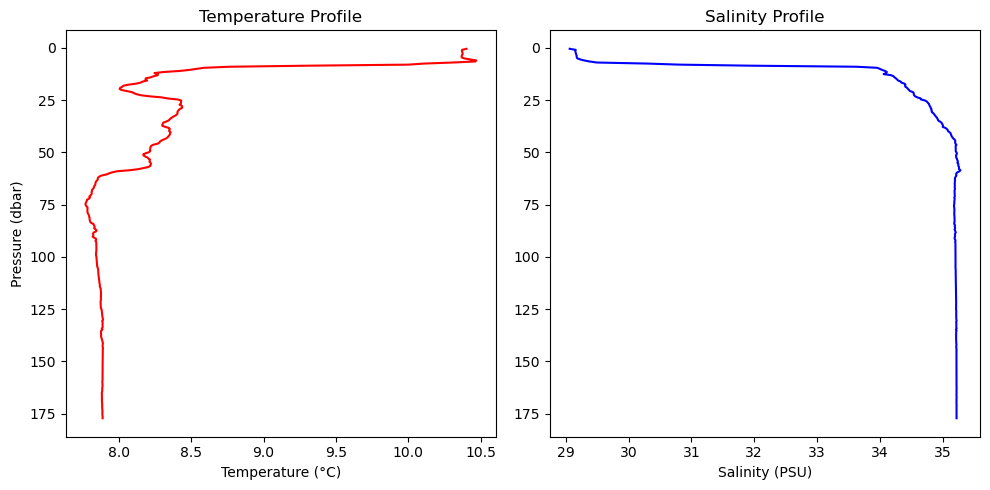

In [9]:
pressure = cnv.data['p']      
temperature = cnv.data['t090C'] 
salinity = cnv.data['sal00']   

plt.figure(figsize=(10, 5))

# Plot Temperature
plt.subplot(1, 2, 1)
plt.plot(temperature, pressure, 'r')
plt.gca().invert_yaxis()  # Depth increases downward
plt.xlabel('Temperature (°C)')
plt.ylabel('Pressure (dbar)')
plt.title('Temperature Profile')

# Plot Salinity
plt.subplot(1, 2, 2)
plt.plot(salinity, pressure, 'b')
plt.gca().invert_yaxis()
plt.xlabel('Salinity (PSU)')
plt.title('Salinity Profile')

plt.tight_layout()
plt.show()

In [10]:
cnv.lat

57.948166666666665

In [11]:
cnv.lon

10.7845

# Along track distance for day 2

INFO:pycnv: Opening file: CTD_05_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_06_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_07_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_08_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_09_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_010_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_011_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_012_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_013_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm


Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date


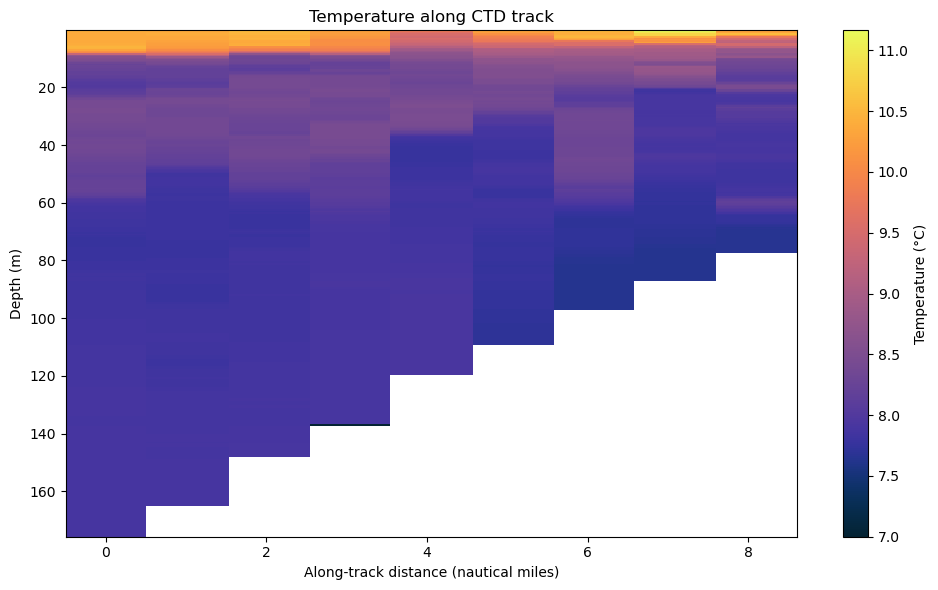

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import pycnv
import os
import gsw

# List of CTD files
fnames = [f'CTD_0{i}_avg.cnv' for i in range(5, 14)]

# Prepare storage
all_depths = []
all_temps = []
all_lats = []
all_lons = []

for fname in fnames:
    cnv = pycnv.pycnv(fname)
    depth = np.array(cnv.data['depSM'])
    temperature = np.array(cnv.data['t090C'])
    all_depths.append(depth)
    all_temps.append(temperature)
    all_lats.append(cnv.lat)
    all_lons.append(cnv.lon)

# Convert lists to arrays
lats = np.array(all_lats)
lons = np.array(all_lons)

# Calculate distance between stations (meters)
distances = gsw.distance(lons, lats)  # gives pairwise distances
distances_nm = distances / 1852       # convert to nautical miles
cumulative_dist_nm = np.insert(np.cumsum(distances_nm), 0, 0)  # start from zero

# Make sure arrays are 2D (same depth grid)
max_len = max(len(d) for d in all_depths)
temp_matrix = np.full((max_len, len(fnames)), np.nan)
depth_matrix = np.full((max_len, len(fnames)), np.nan)

for i, (depth, temp) in enumerate(zip(all_depths, all_temps)):
    temp_matrix[:len(temp), i] = temp
    depth_matrix[:len(depth), i] = depth

# Plot
plt.figure(figsize=(10, 6))
plt.pcolormesh(cumulative_dist_nm, depth_matrix[:, 0], temp_matrix, shading='auto', cmap=cmo.thermal, vmin=7)
plt.gca().invert_yaxis()
plt.colorbar(label='Temperature (°C)')
plt.xlabel('Along-track distance (nautical miles)')
plt.ylabel('Depth (m)')
plt.title('Temperature along CTD track')
plt.tight_layout()
plt.show()



INFO:pycnv: Opening file: CTD_05_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_06_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_07_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_08_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_09_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_010_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_011_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_012_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_013_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm


Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date


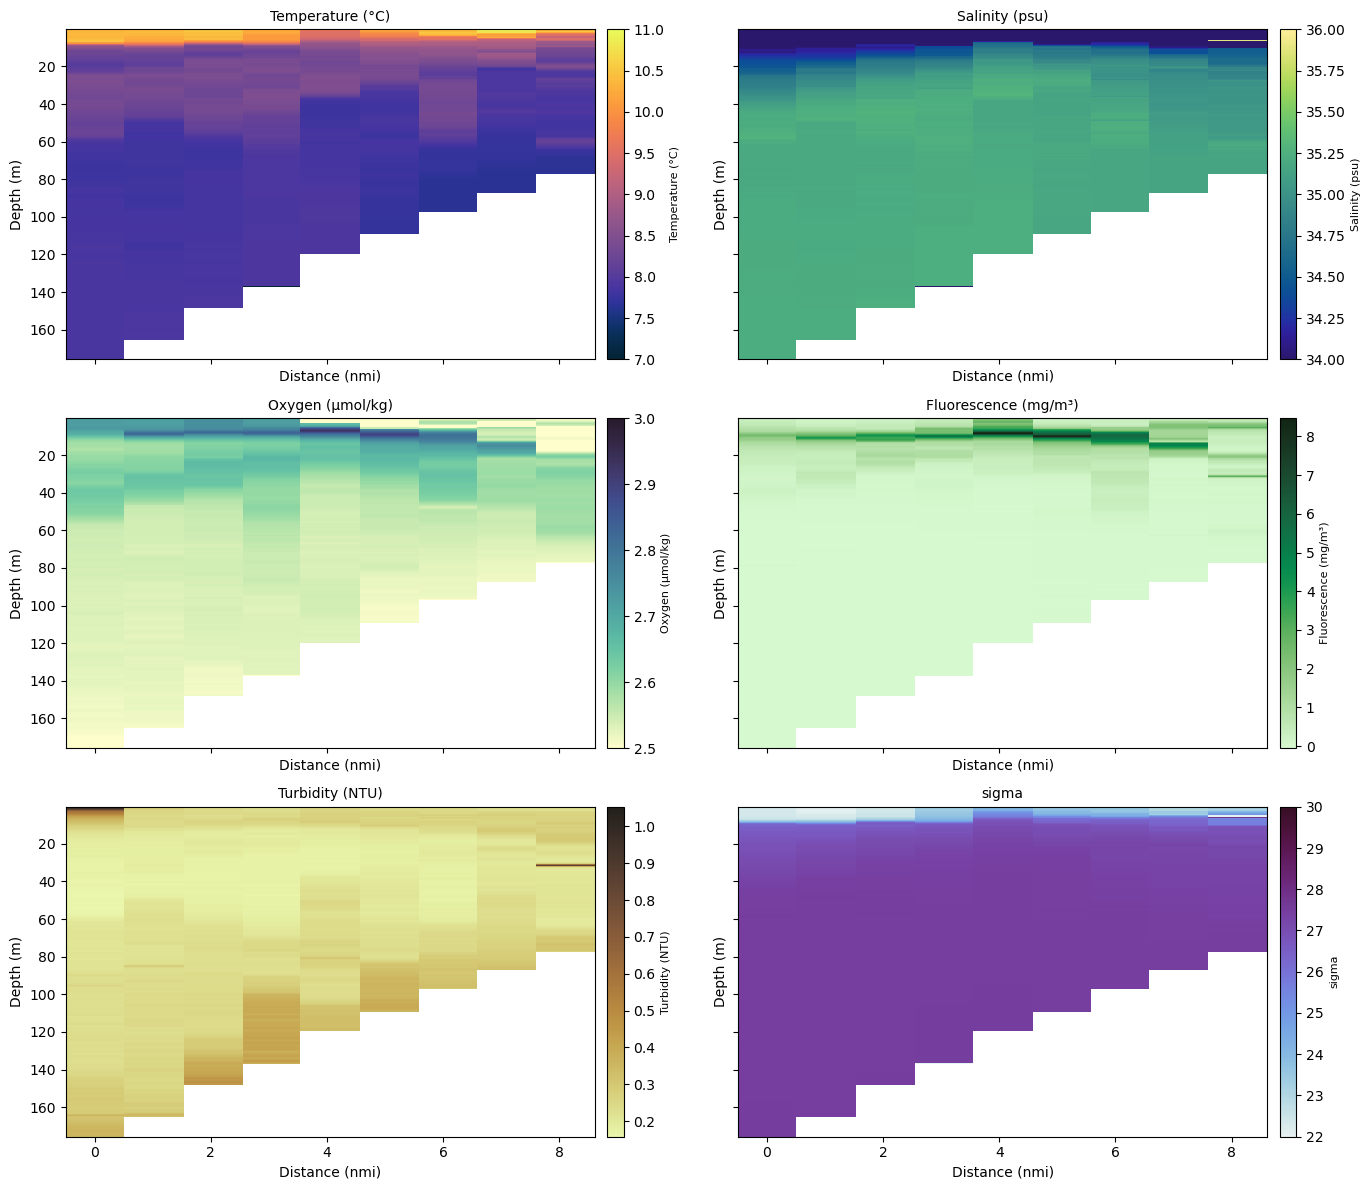

In [105]:
import matplotlib.pyplot as plt
import numpy as np
import cmocean

import numpy as np
import gsw
import pycnv
import os

# List of CTD files
fnames = [f'CTD_0{i}_avg.cnv' for i in range(5, 14)]

# Prepare storage
all_depths = []
all_temps = []
all_sals = []
all_oxys = []
all_fls = []
all_turbs = []
all_dens = []
all_lats = []
all_lons = []

for fname in fnames:
    cnv = pycnv.pycnv(fname)
    depth = np.array(cnv.data['depSM'])
    temp = np.array(cnv.data['t090C'])
    sal = np.array(cnv.data['sal00'])
    oxy = np.array(cnv.data['oxy0'])
    fl = np.array(cnv.data['flECO-AFL'])
    turb = np.array(cnv.data['turb'])
    
    # Calculate density
    pressure = np.array(cnv.data['prDM'])
    SA = gsw.SA_from_SP(sal, pressure, cnv.lon, cnv.lat)
    CT = gsw.CT_from_t(SA, temp, pressure)
    sigma0 = gsw.density.sigma0(SA, CT)
    
    all_depths.append(depth)
    all_temps.append(temp)
    all_sals.append(sal)
    all_oxys.append(oxy)
    all_fls.append(fl)
    all_turbs.append(turb)
    all_dens.append(sigma0)
    all_lats.append(cnv.lat)
    all_lons.append(cnv.lon)

# Convert lat/lon to arrays
lats = np.array(all_lats)
lons = np.array(all_lons)

# Calculate distance between stations (meters → nautical miles)
distances = gsw.distance(lons, lats)
distances_nm = distances / 1852
cumulative_dist_nm = np.insert(np.cumsum(distances_nm), 0, 0)

# Prepare 2D matrices
max_len = max(len(d) for d in all_depths)
temp_matrix = np.full((max_len, len(fnames)), np.nan)
sal_matrix = np.full((max_len, len(fnames)), np.nan)
oxy_matrix = np.full((max_len, len(fnames)), np.nan)
fl_matrix = np.full((max_len, len(fnames)), np.nan)
turb_matrix = np.full((max_len, len(fnames)), np.nan)
dens_matrix = np.full((max_len, len(fnames)), np.nan)
depth_matrix = np.full((max_len, len(fnames)), np.nan)

for i in range(len(fnames)):
    n = len(all_depths[i])
    depth_matrix[:n, i] = all_depths[i]
    temp_matrix[:n, i] = all_temps[i]
    sal_matrix[:n, i] = all_sals[i]
    oxy_matrix[:n, i] = all_oxys[i]
    fl_matrix[:n, i] = all_fls[i]
    turb_matrix[:n, i] = all_turbs[i]
    dens_matrix[:n, i] = all_dens[i]


# Define variables and labels
variables = {
    'Temperature (°C)': {'data': temp_matrix, 'cmap': cmocean.cm.thermal, 'vmin':7, 'vmax':11},
    'Salinity (psu)': {'data': sal_matrix, 'cmap': cmocean.cm.haline, 'vmin':34, 'vmax':36},
    'Oxygen (µmol/kg)': {'data': oxy_matrix, 'cmap': cmocean.cm.deep, 'vmin':2.5, 'vmax':3},
    'Fluorescence (mg/m³)': {'data': fl_matrix, 'cmap': cmocean.cm.algae },
    'Turbidity (NTU)': {'data': turb_matrix, 'cmap': cmocean.cm.turbid},
    'sigma': {'data': dens_matrix, 'cmap': cmocean.cm.dense, 'vmin':22, 'vmax':30}
}

fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=True, sharey=True)
axes = axes.flatten()  # flatten to 1D array for easy looping
for ax, (label, info) in zip(axes, variables.items()):
    vmin = info.get('vmin', None)
    vmax = info.get('vmax', None)
    
    pcm = ax.pcolormesh(
        cumulative_dist_nm,
        depth_matrix[:, 0],
        info['data'],
        shading='auto',
        cmap=info['cmap'],
        vmin=vmin,
        vmax=vmax
    )
    
    ax.invert_yaxis()
    ax.set_title(label, fontsize=10)
    
    # ✅ Correct colorbar call:
    cbar = fig.colorbar(pcm, ax=ax, orientation='vertical', pad=0.02)
    cbar.set_label(label, fontsize=8)
    
    ax.set_xlabel('Distance (nmi)')
    ax.set_ylabel('Depth (m)')


plt.tight_layout()
plt.gca().invert_yaxis()
# Save the figure as a file (choose the format you want: .png, .jpg, .pdf, etc.)
plt.savefig('ctd_along_track_full_depth.png', dpi=300, bbox_inches='tight') 
plt.show()



INFO:pycnv: Opening file: CTD_05_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_06_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_07_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_08_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_09_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_010_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_011_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_012_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_013_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm


Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date


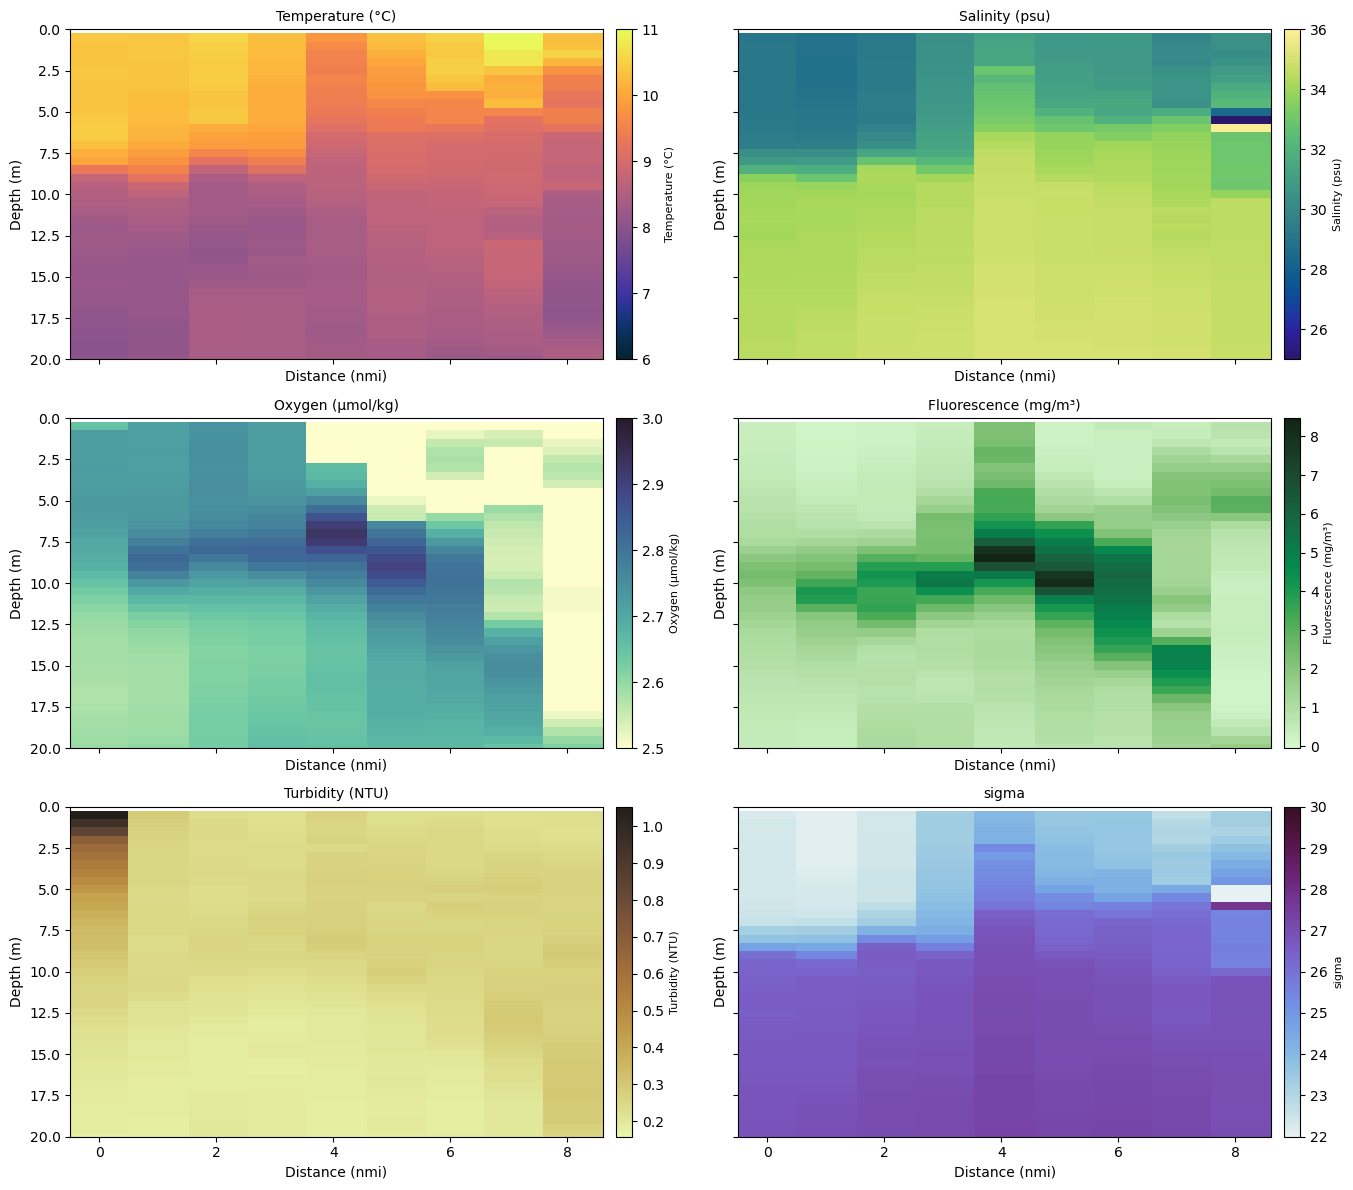

In [107]:
import cmocean

import numpy as np
import gsw
import pycnv
import os

# List of CTD files
fnames = [f'CTD_0{i}_avg.cnv' for i in range(5, 14)]

# Prepare storage
all_depths = []
all_temps = []
all_sals = []
all_oxys = []
all_fls = []
all_turbs = []
all_dens = []
all_lats = []
all_lons = []

for fname in fnames:
    cnv = pycnv.pycnv(fname)
    depth = np.array(cnv.data['depSM'])
    temp = np.array(cnv.data['t090C'])
    sal = np.array(cnv.data['sal00'])
    oxy = np.array(cnv.data['oxy0'])
    fl = np.array(cnv.data['flECO-AFL'])
    turb = np.array(cnv.data['turb'])
    
    # Calculate density
    pressure = np.array(cnv.data['prDM'])
    SA = gsw.SA_from_SP(sal, pressure, cnv.lon, cnv.lat)
    CT = gsw.CT_from_t(SA, temp, pressure)
    sigma0 = gsw.density.sigma0(SA, CT)
    
    all_depths.append(depth)
    all_temps.append(temp)
    all_sals.append(sal)
    all_oxys.append(oxy)
    all_fls.append(fl)
    all_turbs.append(turb)
    all_dens.append(sigma0)
    all_lats.append(cnv.lat)
    all_lons.append(cnv.lon)

# Convert lat/lon to arrays
lats = np.array(all_lats)
lons = np.array(all_lons)

# Calculate distance between stations (meters → nautical miles)
distances = gsw.distance(lons, lats)
distances_nm = distances / 1852
cumulative_dist_nm = np.insert(np.cumsum(distances_nm), 0, 0)

# Prepare 2D matrices
max_len = max(len(d) for d in all_depths)
temp_matrix = np.full((max_len, len(fnames)), np.nan)
sal_matrix = np.full((max_len, len(fnames)), np.nan)
oxy_matrix = np.full((max_len, len(fnames)), np.nan)
fl_matrix = np.full((max_len, len(fnames)), np.nan)
turb_matrix = np.full((max_len, len(fnames)), np.nan)
dens_matrix = np.full((max_len, len(fnames)), np.nan)
depth_matrix = np.full((max_len, len(fnames)), np.nan)

for i in range(len(fnames)):
    n = len(all_depths[i])
    depth_matrix[:n, i] = all_depths[i]
    temp_matrix[:n, i] = all_temps[i]
    sal_matrix[:n, i] = all_sals[i]
    oxy_matrix[:n, i] = all_oxys[i]
    fl_matrix[:n, i] = all_fls[i]
    turb_matrix[:n, i] = all_turbs[i]
    dens_matrix[:n, i] = all_dens[i]


# Define variables and labels
variables = {
    'Temperature (°C)': {'data': temp_matrix, 'cmap': cmocean.cm.thermal, 'vmin':6, 'vmax':11},
    'Salinity (psu)': {'data': sal_matrix, 'cmap': cmocean.cm.haline, 'vmin':25, 'vmax':36},
    'Oxygen (µmol/kg)': {'data': oxy_matrix, 'cmap': cmocean.cm.deep, 'vmin':2.5, 'vmax':3},
    'Fluorescence (mg/m³)': {'data': fl_matrix, 'cmap': cmocean.cm.algae },
    'Turbidity (NTU)': {'data': turb_matrix, 'cmap': cmocean.cm.turbid},
    'sigma': {'data': dens_matrix, 'cmap': cmocean.cm.dense, 'vmin':22, 'vmax':30}
}

fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=True, sharey=True)
axes = axes.flatten()  # flatten to 1D array for easy looping
for ax, (label, info) in zip(axes, variables.items()):
    vmin = info.get('vmin', None)
    vmax = info.get('vmax', None)
    
    pcm = ax.pcolormesh(
        cumulative_dist_nm,
        depth_matrix[:, 0],
        info['data'],
        shading='auto',
        cmap=info['cmap'],
        vmin=vmin,
        vmax=vmax
    )
    
    ax.invert_yaxis()
    ax.set_title(label, fontsize=10)
    
    # ✅ Correct colorbar call:
    cbar = fig.colorbar(pcm, ax=ax, orientation='vertical', pad=0.02)
    cbar.set_label(label, fontsize=8)
    ax.set_ylim(0,20)
    
    ax.set_xlabel('Distance (nmi)')
    ax.set_ylabel('Depth (m)')


plt.tight_layout()
plt.gca().invert_yaxis()

# Save the figure as a file (choose the format you want: .png, .jpg, .pdf, etc.)
plt.savefig('ctd_along_track.png', dpi=300, bbox_inches='tight') 
plt.show()


INFO:pycnv: Opening file: CTD_05_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_06_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_07_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_08_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_09_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_010_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_011_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_012_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_013_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm


Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
[5.5 3.5 4.  3.5 4.5 3.5 3.5 5.  3.5]


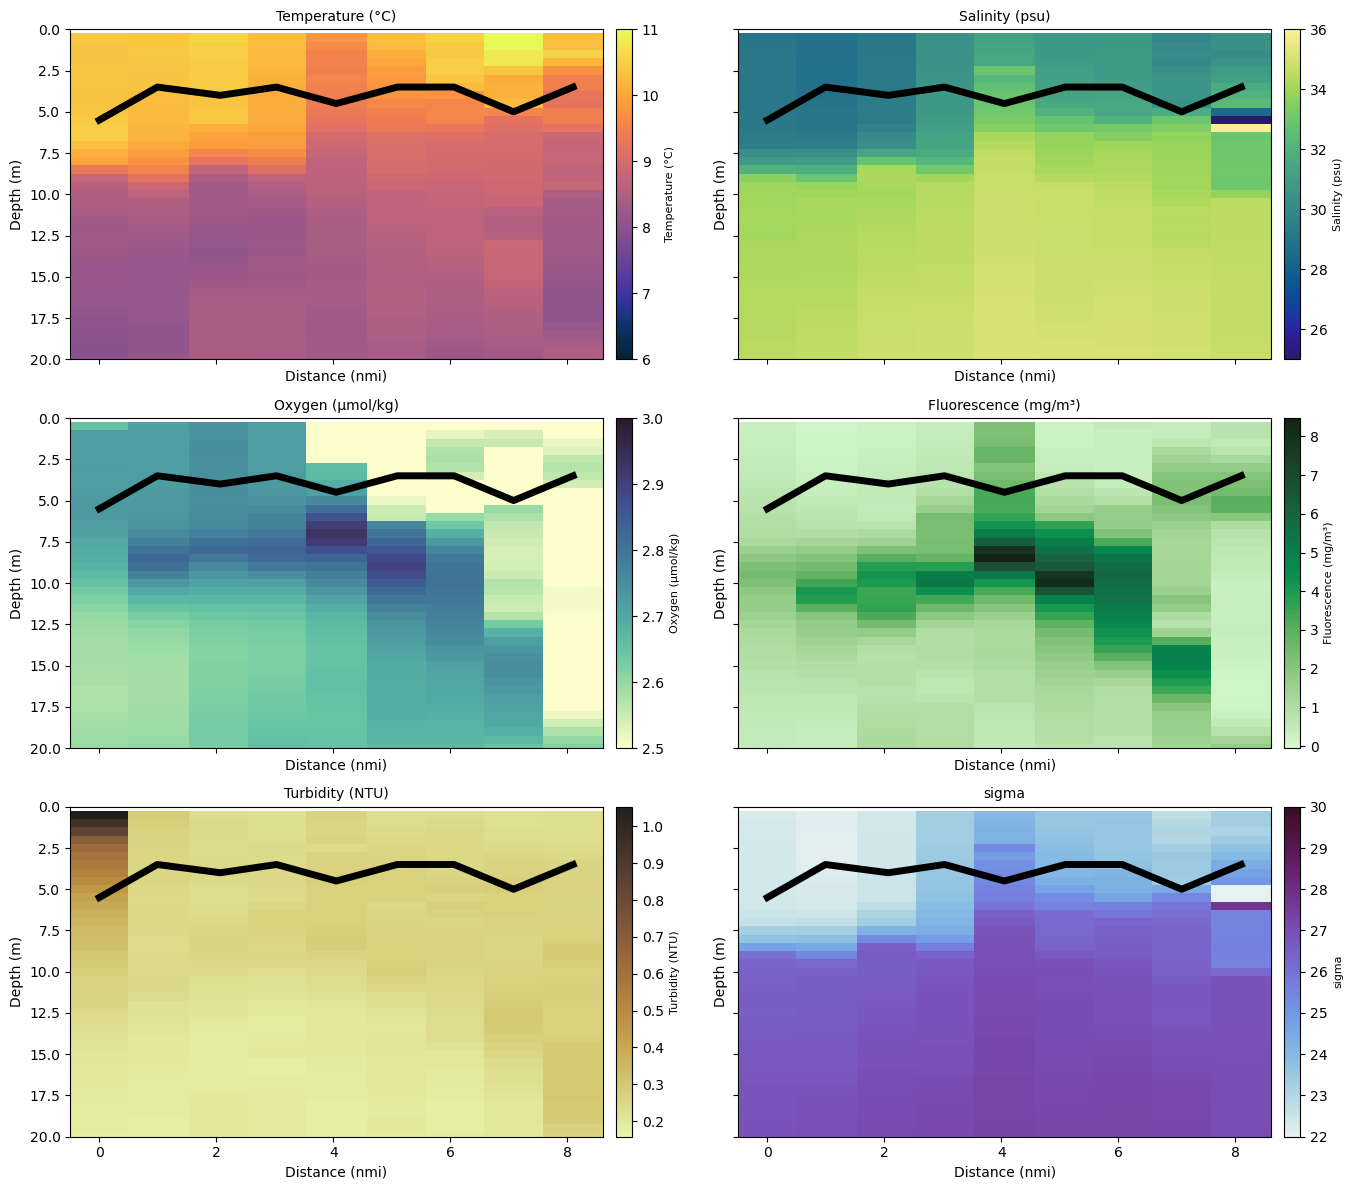

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pycnv
import gsw
import cmocean

# List of CTD files
fnames = [f'CTD_0{i}_avg.cnv' for i in range(5, 14)]

# Prepare storage
all_depths = []
all_temps = []
all_sals = []
all_oxys = []
all_fls = []
all_turbs = []
all_dens = []
all_lats = []
all_lons = []

# Reference depth (in meters)
ref_depth = 4

# Loop through files and read data
for fname in fnames:
    cnv = pycnv.pycnv(fname)
    depth = np.array(cnv.data['depSM'])
    temp = np.array(cnv.data['t090C'])
    sal = np.array(cnv.data['sal00'])
    oxy = np.array(cnv.data['oxy0'])
    fl = np.array(cnv.data['flECO-AFL'])
    turb = np.array(cnv.data['turb'])
    
    # Calculate density
    pressure = np.array(cnv.data['prDM'])
    SA = gsw.SA_from_SP(sal, pressure, cnv.lon, cnv.lat)
    CT = gsw.CT_from_t(SA, temp, pressure)
    sigma0 = gsw.density.sigma0(SA, CT)
    
    all_depths.append(depth)
    all_temps.append(temp)
    all_sals.append(sal)
    all_oxys.append(oxy)
    all_fls.append(fl)
    all_turbs.append(turb)
    all_dens.append(sigma0)
    all_lats.append(cnv.lat)
    all_lons.append(cnv.lon)

# Convert lat/lon to arrays
lats = np.array(all_lats)
lons = np.array(all_lons)

# Calculate distance between stations (meters → nautical miles)
distances = gsw.distance(lons, lats)
distances_nm = distances / 1852
cumulative_dist_nm = np.insert(np.cumsum(distances_nm), 0, 0)

# Prepare 2D matrices
max_len = max(len(d) for d in all_depths)
temp_matrix = np.full((max_len, len(fnames)), np.nan)
sal_matrix = np.full((max_len, len(fnames)), np.nan)
oxy_matrix = np.full((max_len, len(fnames)), np.nan)
fl_matrix = np.full((max_len, len(fnames)), np.nan)
turb_matrix = np.full((max_len, len(fnames)), np.nan)
dens_matrix = np.full((max_len, len(fnames)), np.nan)
depth_matrix = np.full((max_len, len(fnames)), np.nan)

for i in range(len(fnames)):
    n = len(all_depths[i])
    depth_matrix[:n, i] = all_depths[i]
    temp_matrix[:n, i] = all_temps[i]
    sal_matrix[:n, i] = all_sals[i]
    oxy_matrix[:n, i] = all_oxys[i]
    fl_matrix[:n, i] = all_fls[i]
    turb_matrix[:n, i] = all_turbs[i]
    dens_matrix[:n, i] = all_dens[i]

# MLD Calculation
mld_list = []
ref_depth = 3  # Reference depth to calculate from (e.g., 2 meters)

for i in range(len(fnames)):  # Go through each profile
    dens_profile = dens_matrix[:, i]  # Get density profile for station 'i'
    depth_profile = depth_matrix[:, i]  # Corresponding depth profile for the same station

    # Ensure there's valid depth data and the profile is not all NaNs
    if np.all(np.isnan(dens_profile)) or np.all(np.isnan(depth_profile)):
        mld_list.append(np.nan)  # Skip if all values are NaN
        continue

    # Remove NaN values from the profiles (if present)
    valid_indices = ~np.isnan(dens_profile) & ~np.isnan(depth_profile)
    dens_profile = dens_profile[valid_indices]
    depth_profile = depth_profile[valid_indices]

    # Find the index of the depth closest to the reference depth (e.g., 2 meters)
    ref_idx = np.argmin(np.abs(depth_profile - ref_depth))  # Find the closest depth to the reference depth

    # Get the density at the reference depth
    rho_ref = dens_profile[ref_idx]

    # Calculate the density difference (delta_rho) starting from the closest depth to reference depth
    delta_rho = dens_profile - rho_ref  # Density change from the reference depth

    # Find all depths where the density change exceeds the threshold (change is more than 3 kg/m³)
    above_thresh = np.where(delta_rho > 0.03)[0]  # Threshold change is 3 kg/m³, adjust if needed
    
    if len(above_thresh) > 0:
        # Find the closest depth after the reference depth where the threshold is exceeded
        # We will look for the minimum difference between the reference depth and those depths
        closest_idx = np.argmin(np.abs(depth_profile[above_thresh] - ref_depth))
        mld_depth = depth_profile[above_thresh[closest_idx]]  # Get closest depth from the threshold
    else:
        mld_depth = np.nan  # If no change exceeds threshold, mark as NaN

    mld_list.append(mld_depth)

# Convert MLD list to array
mld_array = np.array(mld_list)

# Print MLD array for inspection
print(mld_array)



# Plotting
variables = {
    'Temperature (°C)': {'data': temp_matrix, 'cmap': cmocean.cm.thermal, 'vmin': 6, 'vmax': 11},
    'Salinity (psu)': {'data': sal_matrix, 'cmap': cmocean.cm.haline, 'vmin': 25, 'vmax': 36},
    'Oxygen (µmol/kg)': {'data': oxy_matrix, 'cmap': cmocean.cm.deep, 'vmin': 2.5, 'vmax': 3},
    'Fluorescence (mg/m³)': {'data': fl_matrix, 'cmap': cmocean.cm.algae},
    'Turbidity (NTU)': {'data': turb_matrix, 'cmap': cmocean.cm.turbid},
    'sigma': {'data': dens_matrix, 'cmap': cmocean.cm.dense, 'vmin': 22, 'vmax': 30}
}

fig, axes = plt.subplots(3, 2, figsize=(14, 12), sharex=True, sharey=True)
axes = axes.flatten()

for ax, (label, info) in zip(axes, variables.items()):
    vmin = info.get('vmin', None)
    vmax = info.get('vmax', None)
    
    pcm = ax.pcolormesh(
        cumulative_dist_nm,
        depth_matrix[:, 0],
        info['data'],
        shading='auto',
        cmap=info['cmap'],
        vmin=vmin,
        vmax=vmax
    )
    
    ax.invert_yaxis()
    ax.set_title(label, fontsize=10)
    
    # Plot MLD
    ax.plot(cumulative_dist_nm, mld_array, color='black', linewidth=5, label='MLD (0.03 density change)')
    
    cbar = fig.colorbar(pcm, ax=ax, orientation='vertical', pad=0.02)
    cbar.set_label(label, fontsize=8)
    
    ax.set_ylim(0, 20)  # Adjust depth limits if needed
    #ax.invert_yaxis()
    ax.set_xlabel('Distance (nmi)')
    ax.set_ylabel('Depth (m)')

plt.tight_layout()


plt.gca().invert_yaxis()
plt.show()


In [88]:

mld_list

[9.0, 9.0, 8.5, 9.0, 14.0]

## MULTIPANEL CREATION

In [12]:
fname = 'CTD_04_avg.cnv'
cnv = pycnv.pycnv(fname)

basename = os.path.splitext(fname)[0]              
plot_name = basename.replace('_avg', '') + '_multipanel'  
plot_dir = 'Plots'
os.makedirs(plot_dir, exist_ok=True)

depth = cnv.data['depSM']
temperature = np.array(cnv.data['t090C'])
salinity = np.array(cnv.data['sal00'])
pressure = np.array(cnv.data['prDM'])
oxygen = np.array(cnv.data['oxy0'])
fluorescence = np.array(cnv.data['flECO-AFL'])
turbidity = np.array(cnv.data['turb'])

SA = gsw.SA_from_SP(salinity, pressure, cnv.lon, cnv.lat)
CT = gsw.CT_from_t(SA, temperature, pressure)
sigma0 = gsw.density.sigma0(SA,CT)

INFO:pycnv: Opening file: CTD_04_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm


Date
Computing date


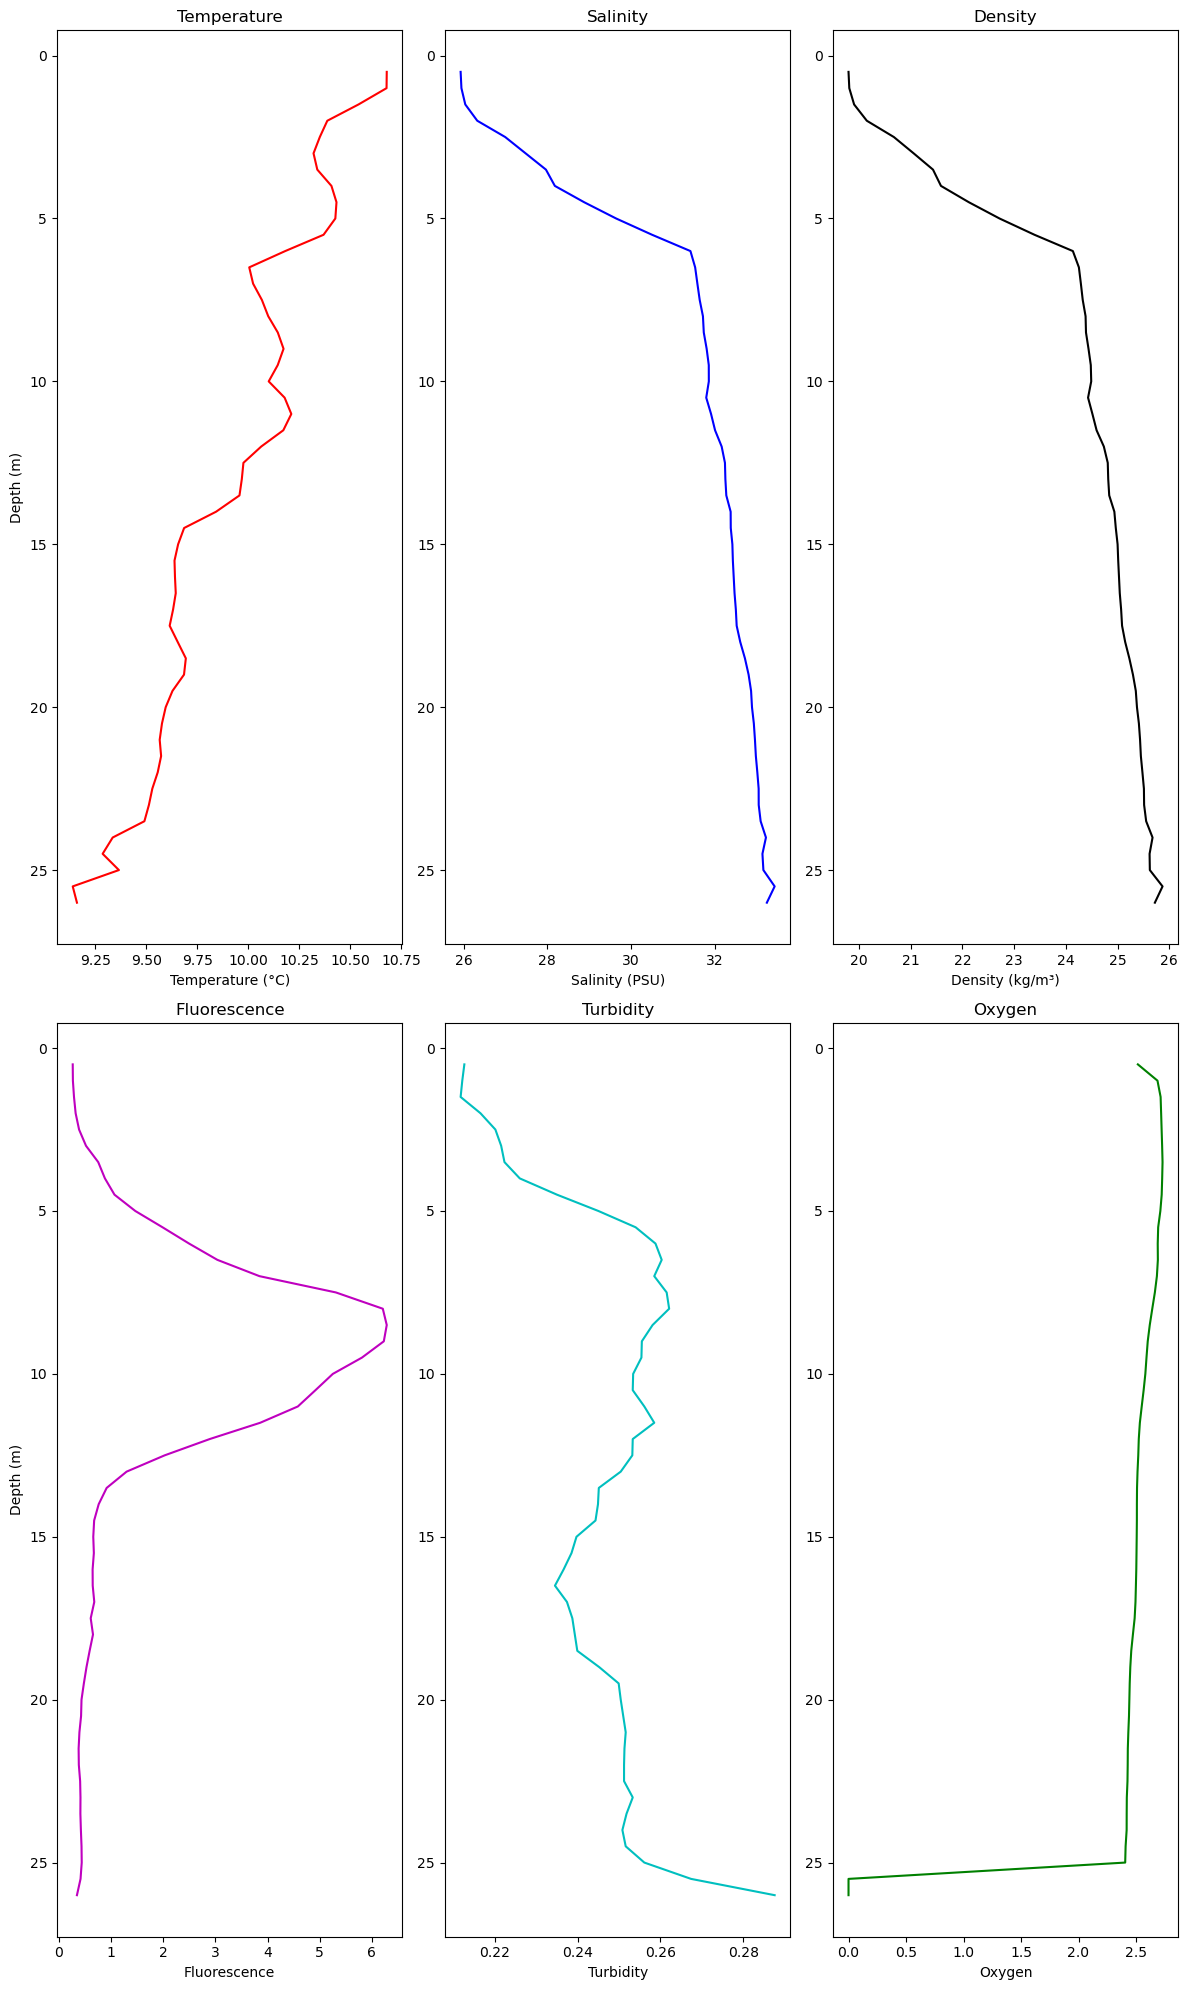

Plot saved to: Plots\CTD_04_multipanel.png


In [13]:
fig, axs = plt.subplots(2, 3, figsize=(12, 20))

axs[0, 0].plot(temperature, depth, 'r')
axs[0, 0].invert_yaxis()
axs[0, 0].set_xlabel('Temperature (°C)')
axs[0, 0].set_ylabel('Depth (m)')
axs[0, 0].set_title('Temperature')

axs[0, 1].plot(salinity, depth, 'b')
axs[0, 1].invert_yaxis()
axs[0, 1].set_xlabel('Salinity (PSU)')
axs[0, 1].set_title('Salinity')

axs[1, 2].plot(oxygen, depth, 'g')
axs[1, 2].invert_yaxis()
axs[1, 2].set_xlabel('Oxygen')
axs[1, 2].set_title('Oxygen')

axs[1, 0].plot(fluorescence, depth, 'm')
axs[1, 0].invert_yaxis()
axs[1, 0].set_xlabel('Fluorescence')
axs[1, 0].set_ylabel('Depth (m)')
axs[1, 0].set_title('Fluorescence')

axs[1, 1].plot(turbidity, depth, 'c')
axs[1, 1].invert_yaxis()
axs[1, 1].set_xlabel('Turbidity')
axs[1, 1].set_title('Turbidity')

axs[0, 2].plot(sigma0, depth, 'k')
axs[0, 2].invert_yaxis()
axs[0, 2].set_xlabel('Density (kg/m³)')
axs[0, 2].set_title('Density')

plt.tight_layout()

output_path = os.path.join(plot_dir, plot_name + '.png')
plt.savefig(output_path, dpi=300)
plt.show()
print(f"Plot saved to: {output_path}")

## CTD COMBINATION - T-S PLOT

In [24]:
import numpy as np
import pycnv
import gsw

# Prepare lists to collect all temperature and salinity values
all_temp = []
all_sali = []
all_sa = []  # To store Absolute Salinity (g/kg)
all_ct = []  # To store Conservative Temperature (°C)

# Loop through CTD_01_avg.cnv to CTD_04_avg.cnv
for i in range(1, 6):
    fname = f'CTD_0{i}_avg.cnv'
    cnv = pycnv.pycnv(fname)
    
    # Get the temperature (°C) and salinity (PSU) from the .cnv file
    temperature = np.array(cnv.data['t090C'])  # in-situ temperature in °C
    salinity = np.array(cnv.data['sal00'])    # Practical Salinity (PSU)
    pressure = np.array(cnv.data['p'])     # Pressure (dbar), assuming it's available

    # Calculate Absolute Salinity (SA) using gsw.SA_from_SP
    SA = gsw.SA_from_SP(salinity, pressure, 0, 0)  # Assume surface pressure for simplicity (0 dbar)
    
    # Calculate Conservative Temperature (CT) using gsw.CT_from_t
    CT = gsw.CT_from_t(SA, temperature, pressure)  # Conservative Temperature (°C)
    
    # Extend the lists to collect all data
    all_temp.extend(temperature)
    all_sali.extend(salinity)
    all_sa.extend(SA)  # Append Absolute Salinity to the list
    all_ct.extend(CT)  # Append Conservative Temperature to the list

# Convert the lists to NumPy arrays
all_temp = np.array(all_temp)
all_sali = np.array(all_sali)
all_sa = np.array(all_sa)
all_ct = np.array(all_ct)

# Print the combined data shapes
#print(f"Combined temperature size: {all_temp.shape}")
#print(f"Combined salinity size: {all_sali.shape}")
#print(f"Combined Absolute Salinity (SA) size: {all_sa.shape}")
#print(f"Combined Conservative Temperature (CT) size: {all_ct.shape}")


INFO:pycnv: Opening file: CTD_01_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_02_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_03_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_04_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_05_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm


Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date


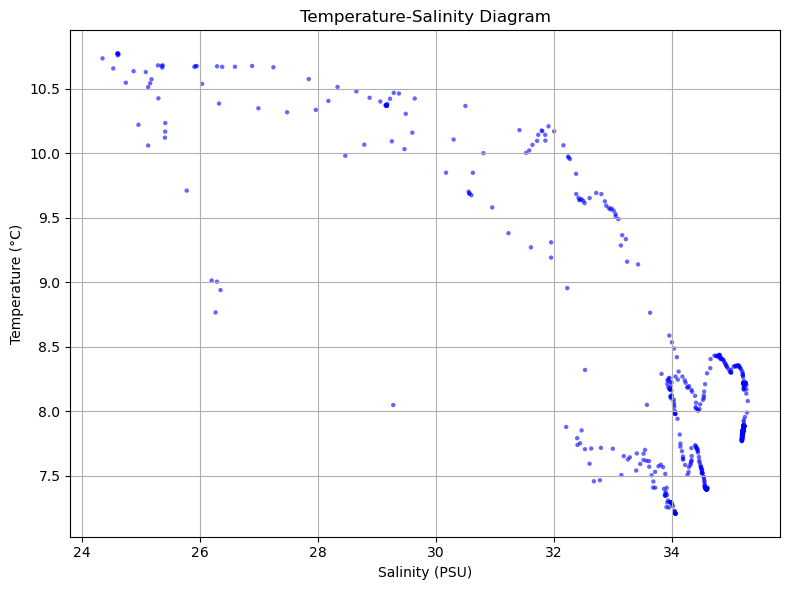

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(all_sali, all_temp, c='blue', s=10, alpha=0.6, edgecolors='none')
plt.xlabel('Salinity (PSU)')
plt.ylabel('Temperature (°C)')
plt.title('Temperature-Salinity Diagram')
plt.grid(True)
plt.tight_layout()
plt.show()

In [26]:
fnames = [f'CTD_0{i}_avg.cnv' for i in range(1, 6)]
colors = ['red', 'green', 'blue', 'purple']
labels = [f'CTD_0{i}' for i in range(1, 6)]

all_temp = []
all_sali = []

# === Load each CNV file ===
for fname in fnames:
    cnv = pycnv.pycnv(fname)
    temp = np.array(cnv.data['t090C'])
    sal = np.array(cnv.data['sal00'])

    all_temp.append(temp)
    all_sali.append(sal)

INFO:pycnv: Opening file: CTD_01_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_02_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_03_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_04_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_05_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm


Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date


INFO:pycnv: Opening file: CTD_01_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_02_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_03_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_04_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_05_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_06_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm


Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date


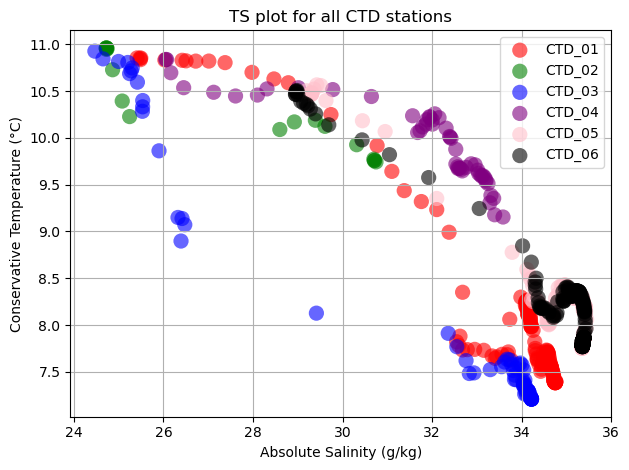

In [51]:
# File names and settings
fnames = [f'CTD_0{i}_avg.cnv' for i in range(1, 7)]
colors = ['red', 'green', 'blue', 'purple', 'pink', 'black', 'gray']  # Different colors for each CTD station
labels = [f'CTD_0{i}' for i in range(1, 7)]  # Labels for each CTD station

all_sa = []  # Absolute Salinity (g/kg)
all_ct = []  # Conservative Temperature (°C)

# Load each CNV file and extract data 
for i, fname in enumerate(fnames):
    cnv = pycnv.pycnv(fname)
    
    # Extract temperature and salinity data
    temp = np.array(cnv.data['t090C'])  # Temperature (°C)
    sal = np.array(cnv.data['sal00'])   # Salinity (PSU)
    pressure = np.array(cnv.data['p'])  # Pressure (dbar)

    # Calculate Absolute Salinity (SA) using gsw.SA_from_SP
    SA = gsw.SA_from_SP(sal, pressure, 0, 0)  # Assuming surface pressure (0 dbar)

    # Calculate Conservative Temperature (CT) using gsw.CT_from_t
    CT = gsw.CT_from_t(SA, temp, pressure)    # Conservative Temperature (°C)

    # Append the results to the lists
    all_sa.extend(SA)
    all_ct.extend(CT)

    # Plot each CTD station's data with a different color
    plt.scatter(SA, CT, color=colors[i], s=120, alpha=0.6, label=labels[i], edgecolors='none')

# Convert lists to NumPy arrays for efficient processing
all_sa = np.array(all_sa)
all_ct = np.array(all_ct)

plt.xlabel('Absolute Salinity (g/kg)')
plt.ylabel('Conservative Temperature (°C)')
plt.title('TS plot for all CTD stations')
plt.grid(True)
plt.legend()
plt.tight_layout()
#plt.savefig('CTD_SA_CT_diagram.png', dpi=300)
plt.show()


In [27]:
# File names and settings
fnames = [f'CTD_0{i}_avg.cnv' for i in range(1, 9)]

# Lists to collect all temperature, salinity, Absolute Salinity (SA), Conservative Temperature (CT), and density (sigma0)
all_temp = []
all_sali = []
all_sa = [] 
all_ct = [] 
all_density = [] 

# === Load each CNV file and extract data ===
for i, fname in enumerate(fnames):
    cnv = pycnv.pycnv(fname)
    
    # Extract temperature and salinity data
    temp = np.array(cnv.data['t090C'])  # Temperature (°C)
    sal = np.array(cnv.data['sal00'])   # Salinity (PSU)
    pressure = np.array(cnv.data['p'])  # Pressure (dbar), assuming it's available

    # Calculate Absolute Salinity (SA) using gsw.SA_from_SP
    SA = gsw.SA_from_SP(sal, pressure, 0, 0)  # Assuming surface pressure (0 dbar)

    # Calculate Conservative Temperature (CT) using gsw.CT_from_t
    CT = gsw.CT_from_t(SA, temp, pressure)    # Conservative Temperature (°C)

    # Calculate density (sigma0) using gsw.density.sigma0
    density = gsw.density.sigma0(SA, CT)  # Density (sigma0)

    # Append the results to the lists
    all_temp.extend(temp)
    all_sali.extend(sal)
    all_sa.extend(SA)  # Append Absolute Salinity to the list
    all_ct.extend(CT)  # Append Conservative Temperature to the list
    all_density.extend(density)  # Append density (sigma0) to the list

# Convert to NumPy arrays for efficient processing
all_temp = np.array(all_temp)
all_sali = np.array(all_sali)
all_sa = np.array(all_sa)
all_ct = np.array(all_ct)
all_density = np.array(all_density)

# Print the combined data sizes
#print(f"Combined temperature size: {all_temp.shape}")
#print(f"Combined salinity size: {all_sali.shape}")
#print(f"Combined Absolute Salinity (SA) size: {all_sa.shape}")
#print(f"Combined Conservative Temperature (CT) size: {all_ct.shape}")
#print(f"Combined density (sigma0) size: {all_density.shape}")

INFO:pycnv: Opening file: CTD_01_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_02_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_03_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_04_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_05_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_06_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_07_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_08_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm


Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date


INFO:pycnv: Opening file: CTD_01_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_02_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_03_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_04_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_05_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_06_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_07_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_08_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm


Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date


INFO:pycnv: Opening file: CTD_01_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_02_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_03_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_04_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm
INFO:pycnv: Opening file: CTD_05_avg.cnv
INFO:pycnv:Converting conductivity units from S/m to mS/cm


Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date
Date
Computing date


IndexError: list index out of range

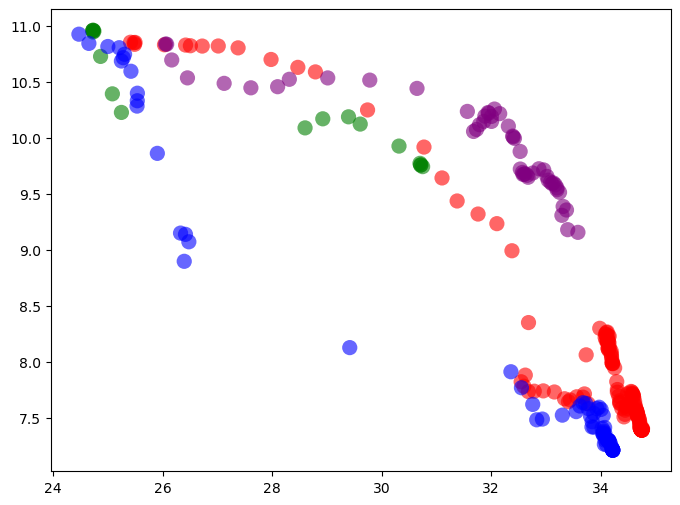

In [28]:
fnames = [f'CTD_0{i}_avg.cnv' for i in range(1, 9)]
colors = ['red', 'green', 'blue', 'purple']  # Different colors for each CTD station
labels = [f'CTD_0{i}' for i in range(1, 9)]  # Labels for each CTD station

# Prepare lists to collect data
all_temp = []  # Temperature (°C)
all_sali = []  # Salinity (PSU)
all_sa = []  # Absolute Salinity (g/kg)
all_ct = []  # Conservative Temperature (°C)
all_density = []  # Density (sigma0)

# Load each CNV file and extract data
for i, fname in enumerate(fnames):
    cnv = pycnv.pycnv(fname)
    
    # Extract temperature and salinity data
    temp = np.array(cnv.data['t090C'])  # Temperature (°C)
    sal = np.array(cnv.data['sal00'])   # Salinity (PSU)
    pressure = np.array(cnv.data['p'])  # Pressure (dbar)

    # Calculate Absolute Salinity (SA) using gsw.SA_from_SP
    SA = gsw.SA_from_SP(sal, pressure, 0, 0)  # Assuming surface pressure (0 dbar)

    # Calculate Conservative Temperature (CT) using gsw.CT_from_t
    CT = gsw.CT_from_t(SA, temp, pressure)    # Conservative Temperature (°C)

    # Calculate density (sigma0) using gsw.density.sigma0
    density = gsw.density.sigma0(SA, CT)  # Density (sigma0)

    # Append the results to the lists
    all_temp.extend(temp)
    all_sali.extend(sal)
    all_sa.extend(SA)  # Append Absolute Salinity to the list
    all_ct.extend(CT)  # Append Conservative Temperature to the list
    all_density.extend(density)  # Append density (sigma0) to the list

# Convert lists to NumPy arrays for efficient processing
all_temp = np.array(all_temp)
all_sali = np.array(all_sali)
all_sa = np.array(all_sa)
all_ct = np.array(all_ct)
all_density = np.array(all_density)

# Create a grid for contour plotting
# Define the ranges for the grid (for both SA and CT) with some padding
sa_min, sa_max = np.min(all_sa) - 0.1, np.max(all_sa) + 0.1
ct_min, ct_max = np.min(all_ct) - 0.1, np.max(all_ct) + 0.1

# Create a mesh grid for SA and CT values
sa_grid, ct_grid = np.meshgrid(np.linspace(sa_min, sa_max, 100), np.linspace(ct_min, ct_max, 100))

# Calculate the corresponding density on the grid (sigma0) using gsw
sigma0_grid = gsw.density.sigma0(sa_grid, ct_grid)

# Plot the T-S diagram with isopycnals
plt.figure(figsize=(8, 6))

# Plot isopycnals as black contours (constant density lines)
contour = plt.contour(sa_grid, ct_grid, sigma0_grid, levels=np.linspace(np.min(all_density), np.max(all_density), 10), colors='black')
plt.clabel(contour, inline=True, fontsize=8, fmt="%.2f")

# Plot the data points for each CTD station with a different color
for i, fname in enumerate(fnames):
    cnv = pycnv.pycnv(fname)
    
    # Extract temperature and salinity data
    temp = np.array(cnv.data['t090C'])  # Temperature (°C)
    sal = np.array(cnv.data['sal00'])   # Salinity (PSU)
    
    # Calculate Absolute Salinity (SA) and Conservative Temperature (CT)
    SA = gsw.SA_from_SP(sal, np.zeros_like(sal), 0, 0)  # Assuming surface pressure (0 dbar)
    CT = gsw.CT_from_t(SA, temp, np.zeros_like(temp))    # Conservative Temperature (°C)
    
    # Plot the data for each CTD station
    plt.scatter(SA, CT, color=colors[i], s=120, alpha=0.6, label=labels[i], edgecolors='none')

# Add labels and title
plt.xlabel('Absolute Salinity (g/kg)')
plt.ylabel('Conservative Temperature (°C)')
plt.title('SA vs CT Diagram with Black Isopycnals')
plt.legend()

# Adjust axes limits to zoom out and make sure all points fit
plt.xlim(sa_min, sa_max)
plt.ylim(ct_min, ct_max)

# Show and save the plot
plt.tight_layout()
plt.savefig('TS PLOT.png', dpi=300)
plt.show()
